In [28]:
from flask import Flask, request, render_template
import pyperclip
import os
import numpy as np
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
from googletrans import Translator

In [29]:
translator = Translator()

In [25]:
## Support Functions

def filter_img(img):
    img = binarize_image(img, threshold=127)
    return img

def binarize_array(np_array, threshold):
    """Binarize a np array."""
    up = np_array > threshold
    new_arr = np.zeros_like(np_array)
    new_arr[up] = 255
    return new_arr

def ocr_image(imagePath, filename, filter, lang):
    img = Image.open(imagePath)
    if filter == 'on':
        img = filter_img(img)
    img.save('static/images/input_image.png')
    try:
        txt = pytesseract.image_to_string(img, lang=lang)
        prediction = "SUCCESS"
    except:
        txt = " pytesseract did not work properly with language: "+lang
        prediction = "FAILURE"
    txt_name = filename.split('.')[0]
    txt_path = 'static/text/recognized_text.txt'
    with open(txt_path, 'w') as f:
        f.write(txt)

    with open(txt_path, 'r') as f:
        content = f.readlines()

    cont = ''.join(content)
    pyperclip.copy(cont)
    #os.remove(imagePath) #
    return prediction, content

def get_ocr(img_path, img_file, filter='on', lang='eng', show_image=True):
    imagePath = img_path+img_file
    prediction, content = ocr_image(imagePath, img_file, filter, lang)
    if show_image:
        plt.figure(figsize = (10,10))
        img = Image.open('static/images/input_image.png')
        plt.imshow(img)
        plt.show() 
    return prediction, content

In [17]:
!ls ./static/images

input_image.png


In [22]:
img_path = 'static/images/'

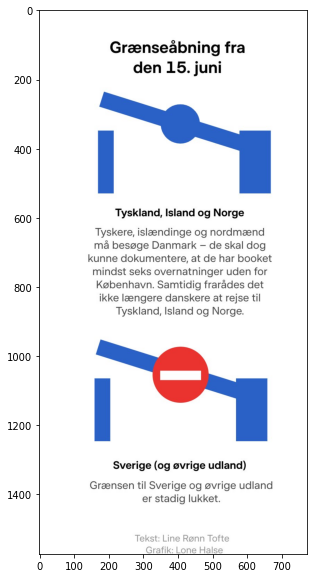

 pytesseract did not work properly with language: eng


In [24]:
img_file = 'input_image.png'
prediction, content = get_ocr(img_path, img_file, filter='off', lang='eng')
print(pyperclip.paste())

In [35]:
text = 'Grænseåbning fraden 15. juniTyskland, Island og NorgeTyskere, islendinger og nordmennskal besøge Danmark - de skal dogkunne dokumentere, at de har booketmindst seks nætter udenforKøbenhavn. Samtidig anbefales det ikkeikke længere danskere at rejse tilTyskland, Island og Norge.Sverige (og andre lande)Grænsen til Sverige og andre landeer stadig lukket.Tekst: Line Rønn TofteGrafisk: Lone Neck'

In [38]:
translator.translate(text, dest='pt').text

'A abertura das fronteiras Fraden 15 jun Alemanha, Islândia e Noruega alemães, islandeses e noruegueses vai visitar a Dinamarca - devem dogkunne demonstrar que ter reservado pelo menos seis noites fora de Copenhague. Ao mesmo tempo, não é recomendado dinamarqueses não mais para viajar para a Alemanha, Islândia e Norge.Sverige (e outros países) fronteira com a Suécia e outro Landeer ainda lukket.Tekst: Linha Ronn Toft Gráfico: Lone Neck'

In [37]:
googletrans.LANGUAGES

NameError: name 'googletrans' is not defined

In [27]:
pytesseract.image_to_string('./static/images/input_image.png')

TesseractNotFoundError: tesseract is not installed or it's not in your PATH

In [14]:
pwd

'/Users/mjrovai/Dropbox/2020/20_MJRoBot/50_OCRovai'